In [1]:
import csv
import glob

# Replace '*.txt' with the pattern for your input files
for file_path in glob.glob('/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/Classic_New_Methods/*.txt'):
    # Generate output file name by replacing '.txt' with '.csv'
    output_file_path = file_path.replace('.txt', '.csv')

    with open(file_path, 'r') as input_file, open(output_file_path, 'w', newline='') as output_file:
        # Create a CSV writer object
        writer = csv.writer(output_file)
        
        # Iterate over each line in the input file
        for line in input_file:
            # Split the line into fields using the tab delimiter
            fields = line.strip().split('\t')

            # Write the fields to the CSV file
            writer.writerow(fields)

# Evaluating the converted CSV Files:

In [5]:
import pandas as pd
import glob

# Replace '*.csv' with the pattern for your input files
for file_path in glob.glob('*.csv'):
    # Generate output file name by prefixing 'Separate' to the input file name
    output_file_path = 'SeparateProteinIDs' + file_path

    # Read input CSV file into a DataFrame
    df = pd.read_csv(file_path)

    # Split the column by '|', but only keep the first two splits if there are more than 2
    split_col = df['Protein IDs'].str.split('|', n=2, expand=True)

    # Rename the new columns
    split_col.columns = ['Protein Type', 'Protein Uniprot', 'Protein Label']

    # Concatenate the original DataFrame and the new columns
    new_df = pd.concat([df['Q-value'], split_col], axis=1)

    # Write the new DataFrame to a separate CSV file
    new_df.to_csv(output_file_path, index=False)

In [8]:
df= pd.read_csv('SeparateProteinIDsClassic_subset_no_remap_100Files.csv')
print(df)

        Q-value Protein Type Protein Uniprot  \
0      0.000205           sp          P13611   
1      0.000205           sp          P37802   
2      0.000205           sp          Q13643   
3      0.000205           sp          Q14847   
4      0.000205           sp          O60763   
...         ...          ...             ...   
11053  0.326614      REV__sp          Q9BQB4   
11054  0.326655      REV__sp          P48200   
11055  0.326655           sp          Q96D09   
11056  0.326655           sp          Q8TEL6   
11057  0.326775      REV__sp          Q0VD83   

                                           Protein Label  
0      CSPG2_HUMAN;sp|P13611-2|CSPG2_HUMAN;sp|P13611-...  
1                    TAGL2_HUMAN;sp|P37802-2|TAGL2_HUMAN  
2                                             FHL3_HUMAN  
3      LASP1_HUMAN;sp|Q14847-2|LASP1_HUMAN;sp|Q14847-...  
4                      USO1_HUMAN;sp|O60763-2|USO1_HUMAN  
...                                                  ...  
11053     

In [9]:
df= pd.read_csv('SeparateProteinIDsClassic_rescued_subset_no_remap_100Files.csv')
print(df)

        Q-value Protein Type Protein Uniprot  \
0      0.000205           sp          P13611   
1      0.000205           sp          P37802   
2      0.000205           sp          Q13643   
3      0.000205           sp          Q14847   
4      0.000205           sp          O60763   
...         ...          ...             ...   
10932  0.331264      REV__sp          Q9BQB4   
10933  0.331305      REV__sp          P48200   
10934  0.331305           sp          Q96D09   
10935  0.331305           sp          Q8TEL6   
10936  0.331426      REV__sp          Q0VD83   

                                           Protein Label  
0      CSPG2_HUMAN;sp|P13611-2|CSPG2_HUMAN;sp|P13611-...  
1                    TAGL2_HUMAN;sp|P37802-2|TAGL2_HUMAN  
2                                             FHL3_HUMAN  
3      LASP1_HUMAN;sp|Q14847-2|LASP1_HUMAN;sp|Q14847-...  
4                      USO1_HUMAN;sp|O60763-2|USO1_HUMAN  
...                                                  ...  
10932     

In [10]:
df= pd.read_csv('SeparateProteinIDsClassic_subset_no_remap_1000Files.csv')
print(df)

        Q-value Protein Type Protein Uniprot  \
0      0.000197           sp          Q9Y277   
1      0.000197           sp          P35579   
2      0.000197           sp          O75477   
3      0.000197           sp          Q9NVT9   
4      0.000197           sp          P18206   
...         ...          ...             ...   
34929  0.850114           sp        Q9BUR5-2   
34930  0.850167      REV__sp          Q9BZA8   
34931  0.850220      REV__sp          Q9H1Z4   
34932  0.850228      REV__sp        Q6ISS4-2   
34933  0.850228           sp        Q06330-3   

                                           Protein Label  
0                    VDAC3_HUMAN;sp|Q9Y277-2|VDAC3_HUMAN  
1                                             MYH9_HUMAN  
2                                            ERLN1_HUMAN  
3                    ARMC1_HUMAN;sp|Q9NVT9-2|ARMC1_HUMAN  
4      VINC_HUMAN;sp|P18206-2|VINC_HUMAN;sp|P18206-3|...  
...                                                  ...  
34929     

In [11]:
import pandas as pd
import os

# Create an empty dictionary to store the counts for each file
file_counts = {}

# Loop through all the CSV files in the directory
for filename in os.listdir():
    if filename.endswith('.csv'):
        # Read the CSV file into a DataFrame
        df = pd.read_csv(filename)
        
        # Split the protein type column into two columns
        df[['Protein Type', 'Protein Uniprot']] = df['Protein Type'].str.split('__', n=1, expand=True)

        # Count the number of target and decoy proteins
        target_count = df['Protein Type'].str.contains('REV').count() - df['Protein Type'].str.contains('REV').sum()
        decoy_count = df['Protein Type'].str.contains('REV').sum()

        # Add the counts to the dictionary
        file_counts[filename] = {'Target Proteins': target_count, 'Decoy Proteins': decoy_count}

# Create a DataFrame from the dictionary
results_df = pd.DataFrame.from_dict(file_counts, orient='index')

# Save the results to a CSV file
#results_df.to_csv('ProteinCounts.csv')

# Print the results for each file
for filename, counts in file_counts.items():
    print(f'File: {filename}, Target Proteins: {counts["Target Proteins"]}, Decoy Proteins: {counts["Decoy Proteins"]}')

File: SeparateProteinIDsClassic_subset_no_remap_200Files.csv, Target Proteins: 10106, Decoy Proteins: 4791
File: SeparateProteinIDsClassic_rescued_subset_no_remap_1700Files.csv, Target Proteins: 19859, Decoy Proteins: 19815
File: SeparateProteinIDsClassic_rescued_subset_no_remap_2000Files.csv, Target Proteins: 20995, Decoy Proteins: 21723
File: SeparateProteinIDsClassic_subset_no_remap_1000Files.csv, Target Proteins: 18881, Decoy Proteins: 16053
File: SeparateProteinIDsClassic_rescued_subset_no_remap_800Files.csv, Target Proteins: 16809, Decoy Proteins: 14738
File: SeparateProteinIDsClassic_subset_no_remap_4000Files.csv, Target Proteins: 26595, Decoy Proteins: 25815
File: SeparateProteinIDsClassic_subset_no_remap_1500Files.csv, Target Proteins: 20882, Decoy Proteins: 19108
File: SeparateProteinIDsClassic_rescued_subset_no_remap_1200Files.csv, Target Proteins: 18578, Decoy Proteins: 17540
File: SeparateProteinIDsClassic_subset_no_remap_700Files.csv, Target Proteins: 17169, Decoy Protein

In [12]:
import pandas as pd
import os

# Define a list of filenames in the desired order
file_order = ['SeparateProteinIDsClassic_subset_no_remap_100Files.csv', 
              'SeparateProteinIDsClassic_subset_no_remap_200Files.csv', 
              'SeparateProteinIDsClassic_subset_no_remap_300Files.csv', 
              'SeparateProteinIDsClassic_subset_no_remap_400Files.csv', 
              'SeparateProteinIDsClassic_subset_no_remap_500Files.csv', 
              'SeparateProteinIDsClassic_subset_no_remap_600Files.csv', 
              'SeparateProteinIDsClassic_subset_no_remap_700Files.csv', 
              'SeparateProteinIDsClassic_subset_no_remap_800Files.csv', 
              'SeparateProteinIDsClassic_subset_no_remap_900Files.csv', 
              'SeparateProteinIDsClassic_subset_no_remap_1000Files.csv', 
              'SeparateProteinIDsClassic_subset_no_remap_1100Files.csv', 
              'SeparateProteinIDsClassic_subset_no_remap_1200Files.csv', 
              'SeparateProteinIDsClassic_subset_no_remap_1300Files.csv', 
              'SeparateProteinIDsClassic_subset_no_remap_1400Files.csv', 
              'SeparateProteinIDsClassic_subset_no_remap_1500Files.csv', 
              'SeparateProteinIDsClassic_subset_no_remap_1600Files.csv', 
              'SeparateProteinIDsClassic_subset_no_remap_1700Files.csv', 
              'SeparateProteinIDsClassic_subset_no_remap_1800Files.csv', 
              'SeparateProteinIDsClassic_subset_no_remap_1900Files.csv', 
              'SeparateProteinIDsClassic_subset_no_remap_2000Files.csv', 
              'SeparateProteinIDsClassic_subset_no_remap_3000Files.csv', 
              'SeparateProteinIDsClassic_subset_no_remap_4000Files.csv', 
              'SeparateProteinIDsClassic_subset_no_remap_5000Files.csv', 
              'SeparateProteinIDsClassic_subset_no_remap_6000Files.csv', 
              'SeparateProteinIDsClassic_rescued_subset_no_remap_100Files.csv', 
              'SeparateProteinIDsClassic_rescued_subset_no_remap_200Files.csv', 
              'SeparateProteinIDsClassic_rescued_subset_no_remap_300Files.csv', 
              'SeparateProteinIDsClassic_rescued_subset_no_remap_400Files.csv', 
              'SeparateProteinIDsClassic_rescued_subset_no_remap_500Files.csv', 
              'SeparateProteinIDsClassic_rescued_subset_no_remap_600Files.csv', 
              'SeparateProteinIDsClassic_rescued_subset_no_remap_700Files.csv', 
              'SeparateProteinIDsClassic_rescued_subset_no_remap_800Files.csv', 
              'SeparateProteinIDsClassic_rescued_subset_no_remap_900Files.csv', 
              'SeparateProteinIDsClassic_rescued_subset_no_remap_1000Files.csv', 
              'SeparateProteinIDsClassic_rescued_subset_no_remap_1100Files.csv', 
              'SeparateProteinIDsClassic_rescued_subset_no_remap_1200Files.csv', 
              'SeparateProteinIDsClassic_rescued_subset_no_remap_1300Files.csv', 
              'SeparateProteinIDsClassic_rescued_subset_no_remap_1400Files.csv', 
              'SeparateProteinIDsClassic_rescued_subset_no_remap_1500Files.csv', 
              'SeparateProteinIDsClassic_rescued_subset_no_remap_1600Files.csv', 
              'SeparateProteinIDsClassic_rescued_subset_no_remap_1700Files.csv', 
              'SeparateProteinIDsClassic_rescued_subset_no_remap_1800Files.csv', 
              'SeparateProteinIDsClassic_rescued_subset_no_remap_1900Files.csv', 
              'SeparateProteinIDsClassic_rescued_subset_no_remap_2000Files.csv', 
              'SeparateProteinIDsClassic_rescued_subset_no_remap_3000Files.csv', 
              'SeparateProteinIDsClassic_rescued_subset_no_remap_4000Files.csv', 
              'SeparateProteinIDsClassic_rescued_subset_no_remap_5000Files.csv', 
              'SeparateProteinIDsClassic_rescued_subset_no_remap_6000Files.csv', 
             ]

# Create an empty dictionary to store the counts for each file
file_counts = {}

# Loop through the filenames in the desired order
for filename in file_order:
    # Read the CSV file into a DataFrame
    df = pd.read_csv(filename)
        
    # Split the protein type column into two columns
    df[['Protein Type', 'Protein Uniprot']] = df['Protein Type'].str.split('__', n=1, expand=True)

    # Count the number of target and decoy proteins
    target_count = df['Protein Type'].str.contains('REV').count() - df['Protein Type'].str.contains('REV').sum()
    decoy_count = df['Protein Type'].str.contains('REV').sum()

    # Add the counts to the dictionary
    file_counts[filename] = {'Target Proteins': target_count, 'Decoy Proteins': decoy_count}

# Create a DataFrame from the dictionary
results_df = pd.DataFrame.from_dict(file_counts, orient='index')

# Save the results to a CSV file
#results_df.to_csv('TargetsandDecoyProteinCountRawFiles.csv')

# Print the results for each file in the desired order
for filename in file_order:
    counts = file_counts[filename]
    print(f'File: {filename}, Target Proteins: {counts["Target Proteins"]}, Decoy Proteins: {counts["Decoy Proteins"]}')

File: SeparateProteinIDsClassic_subset_no_remap_100Files.csv, Target Proteins: 8335, Decoy Proteins: 2723
File: SeparateProteinIDsClassic_subset_no_remap_200Files.csv, Target Proteins: 10106, Decoy Proteins: 4791
File: SeparateProteinIDsClassic_subset_no_remap_300Files.csv, Target Proteins: 11516, Decoy Proteins: 6856
File: SeparateProteinIDsClassic_subset_no_remap_400Files.csv, Target Proteins: 13908, Decoy Proteins: 10022
File: SeparateProteinIDsClassic_subset_no_remap_500Files.csv, Target Proteins: 15418, Decoy Proteins: 11792
File: SeparateProteinIDsClassic_subset_no_remap_600Files.csv, Target Proteins: 16438, Decoy Proteins: 12922
File: SeparateProteinIDsClassic_subset_no_remap_700Files.csv, Target Proteins: 17169, Decoy Proteins: 13750
File: SeparateProteinIDsClassic_subset_no_remap_800Files.csv, Target Proteins: 17888, Decoy Proteins: 14742
File: SeparateProteinIDsClassic_subset_no_remap_900Files.csv, Target Proteins: 18528, Decoy Proteins: 15569
File: SeparateProteinIDsClassic_

In [15]:
import pandas as pd
import os

# Define a list of filenames in the desired order
file_order = ['SeparateProteinIDsClassic_subset_no_remap_100Files.csv', 
              'SeparateProteinIDsClassic_subset_no_remap_200Files.csv', 
              'SeparateProteinIDsClassic_subset_no_remap_300Files.csv', 
              'SeparateProteinIDsClassic_subset_no_remap_400Files.csv', 
              'SeparateProteinIDsClassic_subset_no_remap_500Files.csv', 
              'SeparateProteinIDsClassic_subset_no_remap_600Files.csv', 
              'SeparateProteinIDsClassic_subset_no_remap_700Files.csv', 
              'SeparateProteinIDsClassic_subset_no_remap_800Files.csv', 
              'SeparateProteinIDsClassic_subset_no_remap_900Files.csv', 
              'SeparateProteinIDsClassic_subset_no_remap_1000Files.csv', 
              'SeparateProteinIDsClassic_subset_no_remap_1100Files.csv', 
              'SeparateProteinIDsClassic_subset_no_remap_1200Files.csv', 
              'SeparateProteinIDsClassic_subset_no_remap_1300Files.csv', 
              'SeparateProteinIDsClassic_subset_no_remap_1400Files.csv', 
              'SeparateProteinIDsClassic_subset_no_remap_1500Files.csv', 
              'SeparateProteinIDsClassic_subset_no_remap_1600Files.csv', 
              'SeparateProteinIDsClassic_subset_no_remap_1700Files.csv', 
              'SeparateProteinIDsClassic_subset_no_remap_1800Files.csv', 
              'SeparateProteinIDsClassic_subset_no_remap_1900Files.csv', 
              'SeparateProteinIDsClassic_subset_no_remap_2000Files.csv', 
              'SeparateProteinIDsClassic_subset_no_remap_3000Files.csv', 
              'SeparateProteinIDsClassic_subset_no_remap_4000Files.csv', 
              'SeparateProteinIDsClassic_subset_no_remap_5000Files.csv', 
              'SeparateProteinIDsClassic_subset_no_remap_6000Files.csv', 
              'SeparateProteinIDsClassic_rescued_subset_no_remap_100Files.csv', 
              'SeparateProteinIDsClassic_rescued_subset_no_remap_200Files.csv', 
              'SeparateProteinIDsClassic_rescued_subset_no_remap_300Files.csv', 
              'SeparateProteinIDsClassic_rescued_subset_no_remap_400Files.csv', 
              'SeparateProteinIDsClassic_rescued_subset_no_remap_500Files.csv', 
              'SeparateProteinIDsClassic_rescued_subset_no_remap_600Files.csv', 
              'SeparateProteinIDsClassic_rescued_subset_no_remap_700Files.csv', 
              'SeparateProteinIDsClassic_rescued_subset_no_remap_800Files.csv', 
              'SeparateProteinIDsClassic_rescued_subset_no_remap_900Files.csv', 
              'SeparateProteinIDsClassic_rescued_subset_no_remap_1000Files.csv', 
              'SeparateProteinIDsClassic_rescued_subset_no_remap_1100Files.csv', 
              'SeparateProteinIDsClassic_rescued_subset_no_remap_1200Files.csv', 
              'SeparateProteinIDsClassic_rescued_subset_no_remap_1300Files.csv', 
              'SeparateProteinIDsClassic_rescued_subset_no_remap_1400Files.csv', 
              'SeparateProteinIDsClassic_rescued_subset_no_remap_1500Files.csv', 
              'SeparateProteinIDsClassic_rescued_subset_no_remap_1600Files.csv', 
              'SeparateProteinIDsClassic_rescued_subset_no_remap_1700Files.csv', 
              'SeparateProteinIDsClassic_rescued_subset_no_remap_1800Files.csv', 
              'SeparateProteinIDsClassic_rescued_subset_no_remap_1900Files.csv', 
              'SeparateProteinIDsClassic_rescued_subset_no_remap_2000Files.csv', 
              'SeparateProteinIDsClassic_rescued_subset_no_remap_3000Files.csv', 
              'SeparateProteinIDsClassic_rescued_subset_no_remap_4000Files.csv', 
              'SeparateProteinIDsClassic_rescued_subset_no_remap_5000Files.csv', 
              'SeparateProteinIDsClassic_rescued_subset_no_remap_6000Files.csv', 
             ]

# Create an empty dictionary to store the counts for each file
file_counts = {}

for filename in file_order:
    # Extract the method and number of raw files from the filename
    filename_parts = filename.split('_')
    method = '_'.join(filename_parts[1:-1])
    num_raw_files = filename_parts[-1].split('Files')[0]

    # Read the CSV file into a DataFrame
    df = pd.read_csv(filename)
        
    # Split the protein type column into two columns
    df[['Protein Type', 'Protein Uniprot']] = df['Protein Type'].str.split('__', n=1, expand=True)

    # Count the number of target and decoy proteins
    target_count = df['Protein Type'].str.contains('REV').count() - df['Protein Type'].str.contains('REV').sum()
    decoy_count = df['Protein Type'].str.contains('REV').sum()

    # Add the counts and metadata to the dictionary
    file_counts[filename] = {'Method': method, 'Num Raw Files': num_raw_files,
                             'Target Proteins': target_count, 'Decoy Proteins': decoy_count}

# Create a DataFrame from the dictionary
results_df = pd.DataFrame.from_dict(file_counts, orient='index')

# Save the results to a CSV file
results_df.to_csv('TargetsandDecoyProteinCountRawFiles-NEWMETHODS.csv')

# Print the results for each file in the desired order
for filename in file_order:
    counts = file_counts[filename]
    print(f'File: {filename}, Method: {counts["Method"]}, Num Raw Files: {counts["Num Raw Files"]}, '
          f'Target Proteins: {counts["Target Proteins"]}, Decoy Proteins: {counts["Decoy Proteins"]}')

File: SeparateProteinIDsClassic_subset_no_remap_100Files.csv, Method: subset_no_remap, Num Raw Files: 100, Target Proteins: 8335, Decoy Proteins: 2723
File: SeparateProteinIDsClassic_subset_no_remap_200Files.csv, Method: subset_no_remap, Num Raw Files: 200, Target Proteins: 10106, Decoy Proteins: 4791
File: SeparateProteinIDsClassic_subset_no_remap_300Files.csv, Method: subset_no_remap, Num Raw Files: 300, Target Proteins: 11516, Decoy Proteins: 6856
File: SeparateProteinIDsClassic_subset_no_remap_400Files.csv, Method: subset_no_remap, Num Raw Files: 400, Target Proteins: 13908, Decoy Proteins: 10022
File: SeparateProteinIDsClassic_subset_no_remap_500Files.csv, Method: subset_no_remap, Num Raw Files: 500, Target Proteins: 15418, Decoy Proteins: 11792
File: SeparateProteinIDsClassic_subset_no_remap_600Files.csv, Method: subset_no_remap, Num Raw Files: 600, Target Proteins: 16438, Decoy Proteins: 12922
File: SeparateProteinIDsClassic_subset_no_remap_700Files.csv, Method: subset_no_remap,

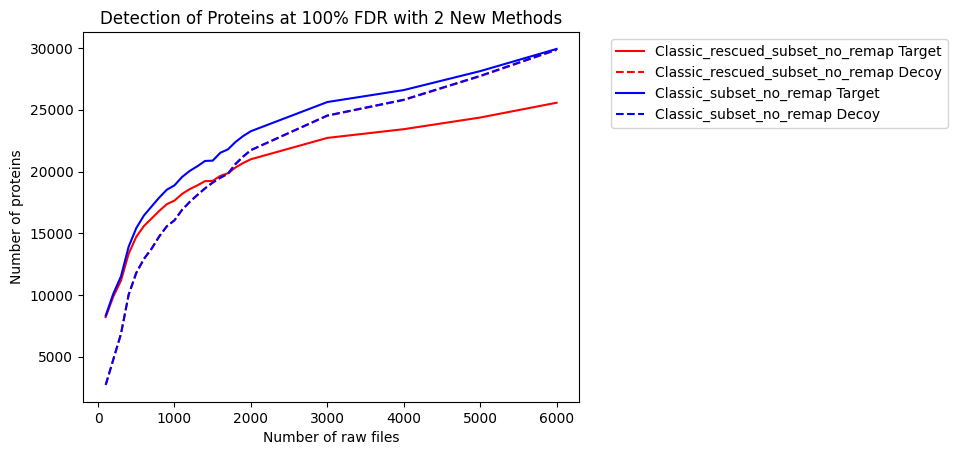

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas dataframe
df = pd.read_csv('TargetsandDecoyProteinCountRawFiles-NEWMETHODS.csv')

# Group the dataframe by method
grouped = df.groupby('Method')

# Set the colors for the different methods
colors = {'Classic_subset_no_remap': 'blue', 'Classic_rescued_subset_no_remap': 'red'}

# Create a figure and axis
fig, ax = plt.subplots()

# Loop through the grouped data and plot a line for each method
for name, group in grouped:
    ax.plot(group['Num Raw Files'], group['Target Proteins'], color=colors[name], label=name+' Target')
    ax.plot(group['Num Raw Files'], group['Decoy Proteins'], linestyle='dashed', color=colors[name], label=name+' Decoy')

# Set the axis labels and legend
ax.set_xlabel('Number of raw files')
ax.set_ylabel('Number of proteins')
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))


plt.title('Detection of Proteins at 100% FDR with 2 New Methods')
# Show the plot
plt.show()

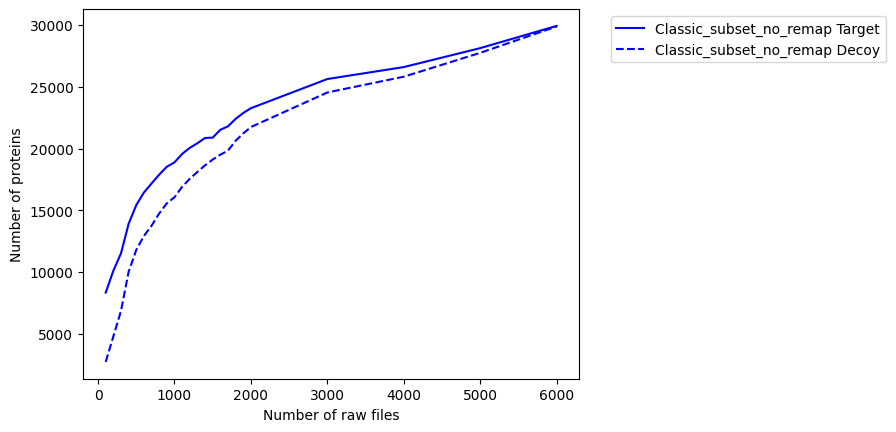

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas dataframe
df = pd.read_csv('TargetsandDecoyProteinCountRawFiles-NEWMETHODS.csv')

#Filter the dataframe to only include the desired method
df_filtered = df[df['Method'] == 'Classic_subset_no_remap']

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the target proteins and decoy proteins for the selected method
ax.plot(df_filtered['Num Raw Files'], df_filtered['Target Proteins'], color='blue', label='Classic_subset_no_remap Target')
ax.plot(df_filtered['Num Raw Files'], df_filtered['Decoy Proteins'], linestyle='dashed', color='blue', label='Classic_subset_no_remap Decoy')

# Set the axis labels and legend
ax.set_xlabel('Number of raw files')
ax.set_ylabel('Number of proteins')
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

# Show the plot
plt.show()


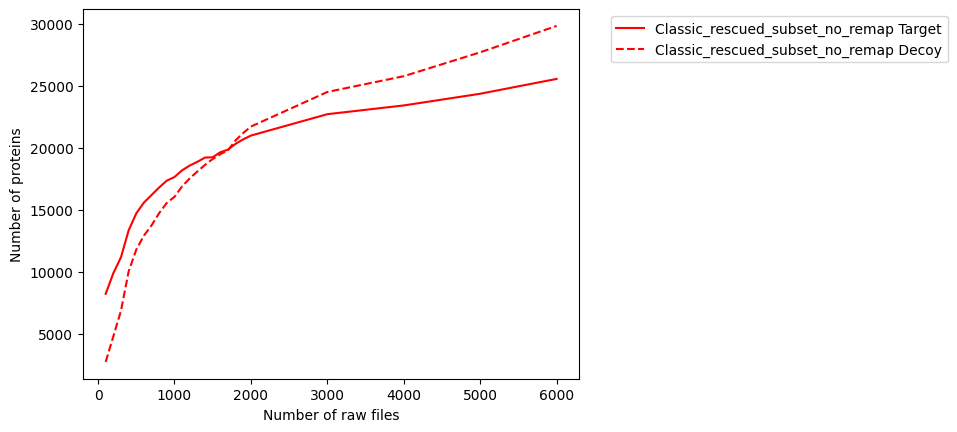

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas dataframe
df = pd.read_csv('TargetsandDecoyProteinCountRawFiles-NEWMETHODS.csv')

#Filter the dataframe to only include the desired method
df_filtered = df[df['Method'] == 'Classic_rescued_subset_no_remap']

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the target proteins and decoy proteins for the selected method
ax.plot(df_filtered['Num Raw Files'], df_filtered['Target Proteins'], color='red', label='Classic_rescued_subset_no_remap Target')
ax.plot(df_filtered['Num Raw Files'], df_filtered['Decoy Proteins'], linestyle='dashed', color='red', label='Classic_rescued_subset_no_remap Decoy')

# Set the axis labels and legend
ax.set_xlabel('Number of raw files')
ax.set_ylabel('Number of proteins')
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

# Show the plot
plt.show()


# Q-value Filter (1% FDR) 

In [25]:
import pandas as pd
import os

# Define a list of filenames in the desired order
file_order = ['SeparateProteinIDsClassic_subset_no_remap_100Files.csv', 
              'SeparateProteinIDsClassic_subset_no_remap_200Files.csv', 
              'SeparateProteinIDsClassic_subset_no_remap_300Files.csv', 
              'SeparateProteinIDsClassic_subset_no_remap_400Files.csv', 
              'SeparateProteinIDsClassic_subset_no_remap_500Files.csv', 
              'SeparateProteinIDsClassic_subset_no_remap_600Files.csv', 
              'SeparateProteinIDsClassic_subset_no_remap_700Files.csv', 
              'SeparateProteinIDsClassic_subset_no_remap_800Files.csv', 
              'SeparateProteinIDsClassic_subset_no_remap_900Files.csv', 
              'SeparateProteinIDsClassic_subset_no_remap_1000Files.csv', 
              'SeparateProteinIDsClassic_subset_no_remap_1100Files.csv', 
              'SeparateProteinIDsClassic_subset_no_remap_1200Files.csv', 
              'SeparateProteinIDsClassic_subset_no_remap_1300Files.csv', 
              'SeparateProteinIDsClassic_subset_no_remap_1400Files.csv', 
              'SeparateProteinIDsClassic_subset_no_remap_1500Files.csv', 
              'SeparateProteinIDsClassic_subset_no_remap_1600Files.csv', 
              'SeparateProteinIDsClassic_subset_no_remap_1700Files.csv', 
              'SeparateProteinIDsClassic_subset_no_remap_1800Files.csv', 
              'SeparateProteinIDsClassic_subset_no_remap_1900Files.csv', 
              'SeparateProteinIDsClassic_subset_no_remap_2000Files.csv', 
              'SeparateProteinIDsClassic_subset_no_remap_3000Files.csv', 
              'SeparateProteinIDsClassic_subset_no_remap_4000Files.csv', 
              'SeparateProteinIDsClassic_subset_no_remap_5000Files.csv', 
              'SeparateProteinIDsClassic_subset_no_remap_6000Files.csv', 
              'SeparateProteinIDsClassic_rescued_subset_no_remap_100Files.csv', 
              'SeparateProteinIDsClassic_rescued_subset_no_remap_200Files.csv', 
              'SeparateProteinIDsClassic_rescued_subset_no_remap_300Files.csv', 
              'SeparateProteinIDsClassic_rescued_subset_no_remap_400Files.csv', 
              'SeparateProteinIDsClassic_rescued_subset_no_remap_500Files.csv', 
              'SeparateProteinIDsClassic_rescued_subset_no_remap_600Files.csv', 
              'SeparateProteinIDsClassic_rescued_subset_no_remap_700Files.csv', 
              'SeparateProteinIDsClassic_rescued_subset_no_remap_800Files.csv', 
              'SeparateProteinIDsClassic_rescued_subset_no_remap_900Files.csv', 
              'SeparateProteinIDsClassic_rescued_subset_no_remap_1000Files.csv', 
              'SeparateProteinIDsClassic_rescued_subset_no_remap_1100Files.csv', 
              'SeparateProteinIDsClassic_rescued_subset_no_remap_1200Files.csv', 
              'SeparateProteinIDsClassic_rescued_subset_no_remap_1300Files.csv', 
              'SeparateProteinIDsClassic_rescued_subset_no_remap_1400Files.csv', 
              'SeparateProteinIDsClassic_rescued_subset_no_remap_1500Files.csv', 
              'SeparateProteinIDsClassic_rescued_subset_no_remap_1600Files.csv', 
              'SeparateProteinIDsClassic_rescued_subset_no_remap_1700Files.csv', 
              'SeparateProteinIDsClassic_rescued_subset_no_remap_1800Files.csv', 
              'SeparateProteinIDsClassic_rescued_subset_no_remap_1900Files.csv', 
              'SeparateProteinIDsClassic_rescued_subset_no_remap_2000Files.csv', 
              'SeparateProteinIDsClassic_rescued_subset_no_remap_3000Files.csv', 
              'SeparateProteinIDsClassic_rescued_subset_no_remap_4000Files.csv', 
              'SeparateProteinIDsClassic_rescued_subset_no_remap_5000Files.csv', 
              'SeparateProteinIDsClassic_rescued_subset_no_remap_6000Files.csv', 
             ]

# Define the Q-value cutoff
q_value_cutoff = 0.01

# Create an empty dictionary to store the counts for each file
file_counts = {}

for filename in file_order:
    # Extract the method and number of raw files from the filename
    filename_parts = filename.split('_')
    method = '_'.join(filename_parts[1:-1])
    num_raw_files = filename_parts[-1].split('Files')[0]

    # Read the CSV file into a DataFrame
    df = pd.read_csv(filename)
        
    # Split the protein type column into two columns
    df[['Protein Type', 'Protein Uniprot']] = df['Protein Type'].str.split('__', n=1, expand=True)

    # Filter by Q-value
    df = df[df['Q-value'] <= q_value_cutoff]

    # Count the number of target and decoy proteins
    target_count = df['Protein Type'].str.contains('REV').count() - df['Protein Type'].str.contains('REV').sum()
    decoy_count = df['Protein Type'].str.contains('REV').sum()

    # Add the counts and metadata to the dictionary
    file_counts[filename] = {'Method': method, 'Num Raw Files': num_raw_files,
                             'Target Proteins': target_count, 'Decoy Proteins': decoy_count}

# Create a DataFrame from the dictionary
results_df = pd.DataFrame.from_dict(file_counts, orient='index')

# Save the results to a CSV file
results_df.to_csv('TargetsandDecoyProteinCountRawFiles-NEWMETHODS-QVALUE.csv')

# Print the results for each file in the desired order
for filename in file_order:
    counts = file_counts[filename]
    print(f'File: {filename}, Method: {counts["Method"]}, Num Raw Files: {counts["Num Raw Files"]}, '
          f'Target Proteins: {counts["Target Proteins"]}, Decoy Proteins: {counts["Decoy Proteins"]}')

File: SeparateProteinIDsClassic_subset_no_remap_100Files.csv, Method: subset_no_remap, Num Raw Files: 100, Target Proteins: 5970, Decoy Proteins: 58
File: SeparateProteinIDsClassic_subset_no_remap_200Files.csv, Method: subset_no_remap, Num Raw Files: 200, Target Proteins: 6413, Decoy Proteins: 63
File: SeparateProteinIDsClassic_subset_no_remap_300Files.csv, Method: subset_no_remap, Num Raw Files: 300, Target Proteins: 6481, Decoy Proteins: 63
File: SeparateProteinIDsClassic_subset_no_remap_400Files.csv, Method: subset_no_remap, Num Raw Files: 400, Target Proteins: 6630, Decoy Proteins: 65
File: SeparateProteinIDsClassic_subset_no_remap_500Files.csv, Method: subset_no_remap, Num Raw Files: 500, Target Proteins: 7228, Decoy Proteins: 71
File: SeparateProteinIDsClassic_subset_no_remap_600Files.csv, Method: subset_no_remap, Num Raw Files: 600, Target Proteins: 7854, Decoy Proteins: 77
File: SeparateProteinIDsClassic_subset_no_remap_700Files.csv, Method: subset_no_remap, Num Raw Files: 700,

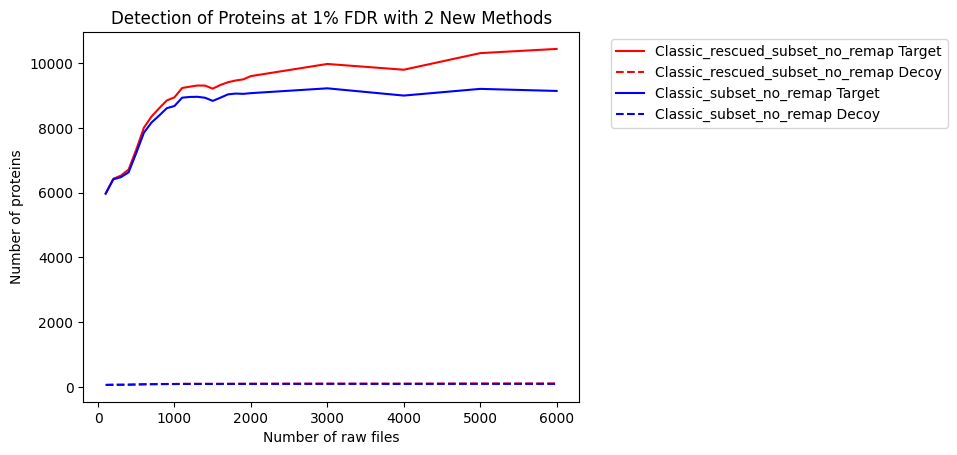

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas dataframe
df = pd.read_csv('TargetsandDecoyProteinCountRawFiles-NEWMETHODS-QVALUE.csv')

# Group the dataframe by method
grouped = df.groupby('Method')

# Set the colors for the different methods
colors = {'Classic_subset_no_remap': 'blue', 'Classic_rescued_subset_no_remap': 'red'}

# Create a figure and axis
fig, ax = plt.subplots()

# Loop through the grouped data and plot a line for each method
for name, group in grouped:
    ax.plot(group['Num Raw Files'], group['Target Proteins'], color=colors[name], label=name+' Target')
    ax.plot(group['Num Raw Files'], group['Decoy Proteins'], linestyle='dashed', color=colors[name], label=name+' Decoy')

# Set the axis labels and legend
ax.set_xlabel('Number of raw files')
ax.set_ylabel('Number of proteins')
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))


plt.title('Detection of Proteins at 1% FDR with 2 New Methods')
# Show the plot
plt.show()

# Decoys at 1% FDR

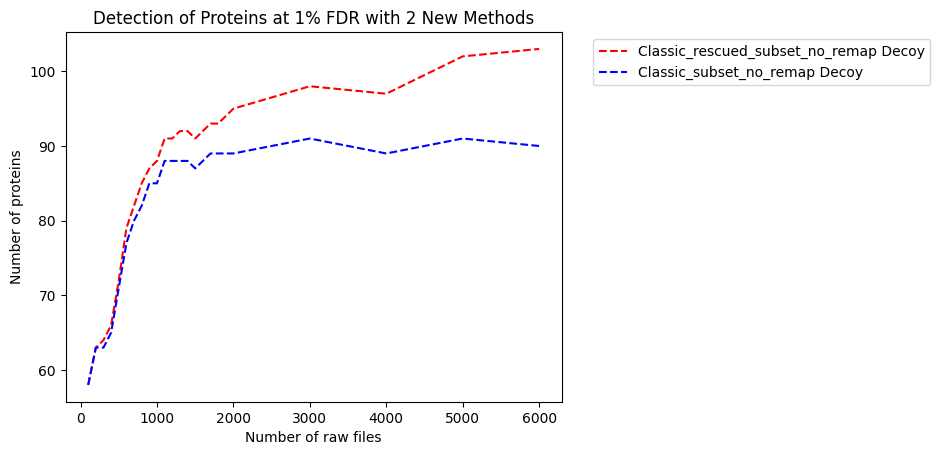

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas dataframe
df = pd.read_csv('TargetsandDecoyProteinCountRawFiles-NEWMETHODS-QVALUE.csv')

# Group the dataframe by method
grouped = df.groupby('Method')

# Set the colors for the different methods
colors = {'Classic_subset_no_remap': 'blue', 'Classic_rescued_subset_no_remap': 'red'}

# Create a figure and axis
fig, ax = plt.subplots()

# Loop through the grouped data and plot a line for each method
for name, group in grouped:
    #ax.plot(group['Num Raw Files'], group['Target Proteins'], color=colors[name], label=name+' Target')
    ax.plot(group['Num Raw Files'], group['Decoy Proteins'], linestyle='dashed', color=colors[name], label=name+' Decoy')

# Set the axis labels and legend
ax.set_xlabel('Number of raw files')
ax.set_ylabel('Number of proteins')
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))


plt.title('Detection of Proteins at 1% FDR with 2 New Methods')
# Show the plot
plt.show()

# Target and Decoys at 1% FDR

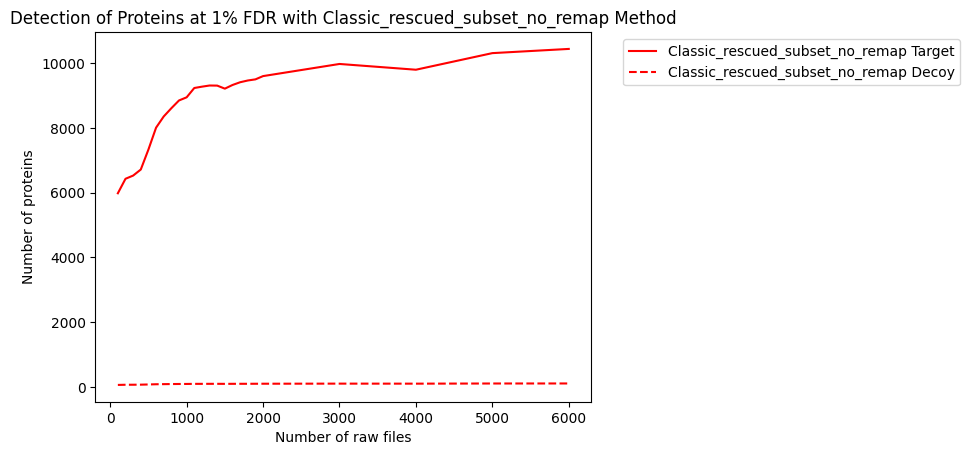

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas dataframe
df = pd.read_csv('TargetsandDecoyProteinCountRawFiles-NEWMETHODS-QVALUE.csv')


#Filter the dataframe to only include the desired method
df_filtered = df[df['Method'] == 'Classic_rescued_subset_no_remap']

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the target proteins and decoy proteins for the selected method
ax.plot(df_filtered['Num Raw Files'], df_filtered['Target Proteins'], color='red', label='Classic_rescued_subset_no_remap Target')
ax.plot(df_filtered['Num Raw Files'], df_filtered['Decoy Proteins'], linestyle='dashed', color='red', label='Classic_rescued_subset_no_remap Decoy')

# Set the axis labels and legend
ax.set_xlabel('Number of raw files')
ax.set_ylabel('Number of proteins')
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))


plt.title('Detection of Proteins at 1% FDR with Classic_rescued_subset_no_remap Method')
# Show the plot
plt.show()





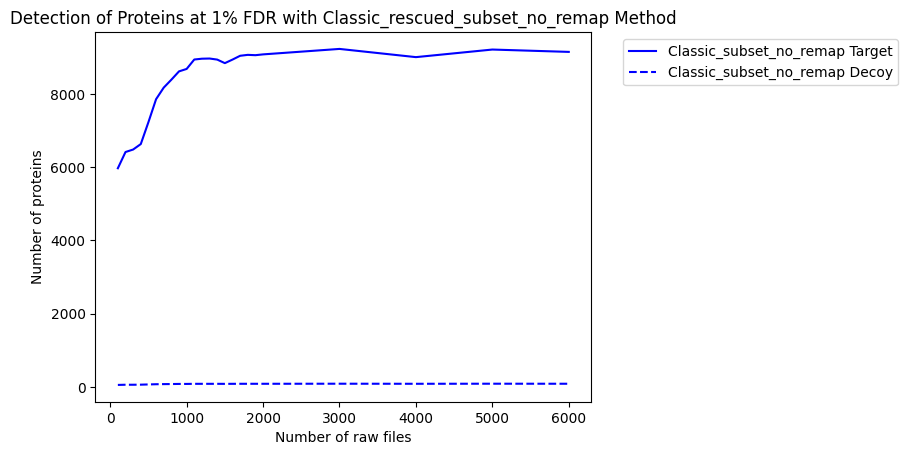

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas dataframe
df = pd.read_csv('TargetsandDecoyProteinCountRawFiles-NEWMETHODS-QVALUE.csv')


#Filter the dataframe to only include the desired method
df_filtered = df[df['Method'] == 'Classic_subset_no_remap']

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the target proteins and decoy proteins for the selected method
ax.plot(df_filtered['Num Raw Files'], df_filtered['Target Proteins'], color='blue', label='Classic_subset_no_remap Target')
ax.plot(df_filtered['Num Raw Files'], df_filtered['Decoy Proteins'], linestyle='dashed', color='blue', label='Classic_subset_no_remap Decoy')

# Set the axis labels and legend
ax.set_xlabel('Number of raw files')
ax.set_ylabel('Number of proteins')
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))


plt.title('Detection of Proteins at 1% FDR with Classic_rescued_subset_no_remap Method')
# Show the plot
plt.show()

